# XG325: Explainable Artificial Intelligence
    
## Exercise 1

**Week 07 | Lecture 03**

_Saturday, April 13, 2025_

Presented by Dr. Marcin Abram

In [1]:
import numpy
import pandas
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import tensorflow

numpy.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

## Example (CIFAR10)

In [2]:
(trainval_x, trainval_y), (test_x, test_y) = tensorflow.keras.datasets.cifar10.load_data()
trainval_x.shape, trainval_x.dtype

((50000, 32, 32, 3), dtype('uint8'))

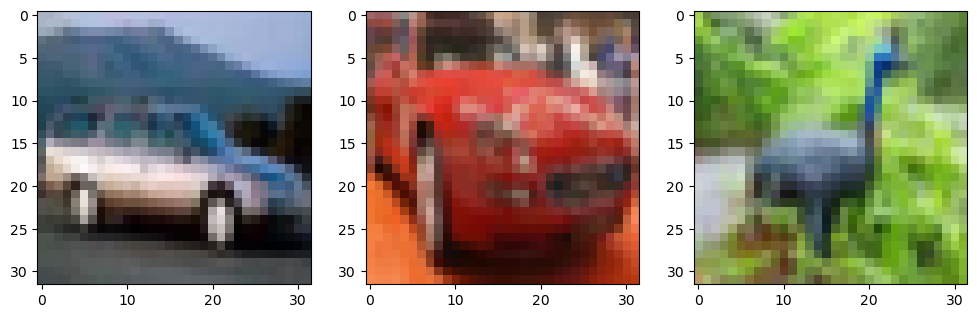

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(trainval_x[4])
axes[1].imshow(trainval_x[5])
axes[2].imshow(trainval_x[6])
plt.show()

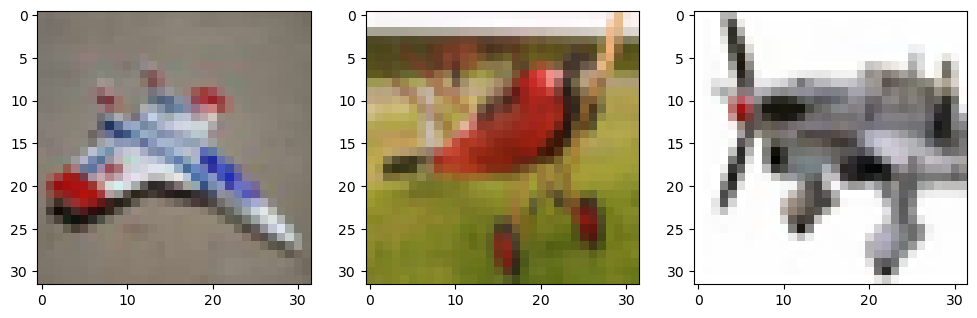

In [4]:
# airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
data = trainval_x[trainval_y.flatten() == 0]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(data[1])
axes[1].imshow(data[2])
axes[2].imshow(data[3])
plt.show()

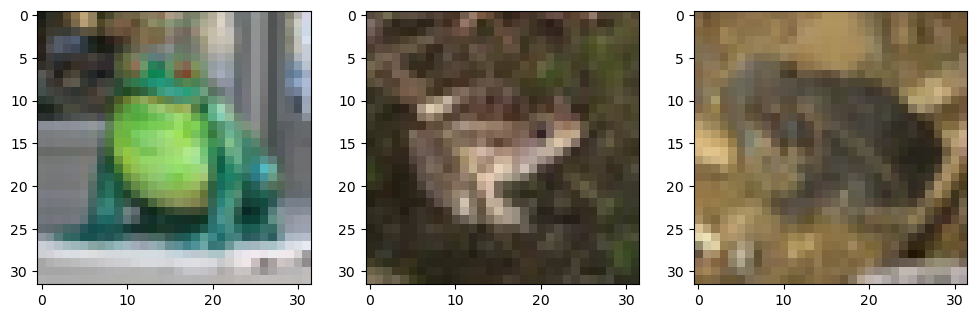

In [5]:
# airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
data = trainval_x[trainval_y.flatten() == 6]

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(data[1])
axes[1].imshow(data[2])
axes[2].imshow(data[3])
plt.show()

In [6]:
A, B = 0, 6
mask = (trainval_y.flatten() == A) | (trainval_y.flatten() == B)
data = trainval_x[mask].reshape(-1, 32*32*3)
labels = trainval_y[mask].flatten()

pca = sklearn.decomposition.PCA(n_components=40)
pca.fit(data[:1000])

print(pca.explained_variance_ratio_[:10])

[0.4090309  0.08992922 0.06467968 0.04607245 0.02436073 0.02295632
 0.01776199 0.01580871 0.01474387 0.01110446]


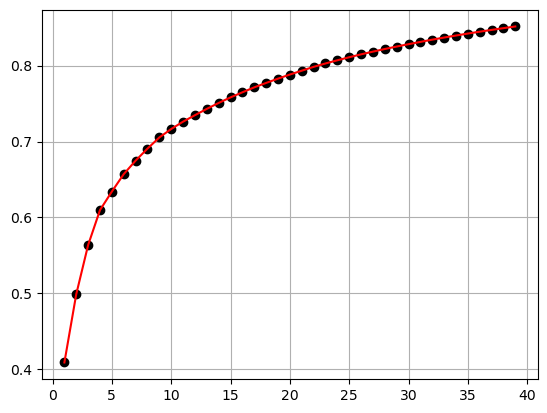

In [7]:
x = list(range(1, 40))
y = [sum(pca.explained_variance_ratio_[:n]) for n in x]

plt.plot(x, y, 'ko')
plt.plot(x, y, 'r-')
plt.grid(); plt.show()

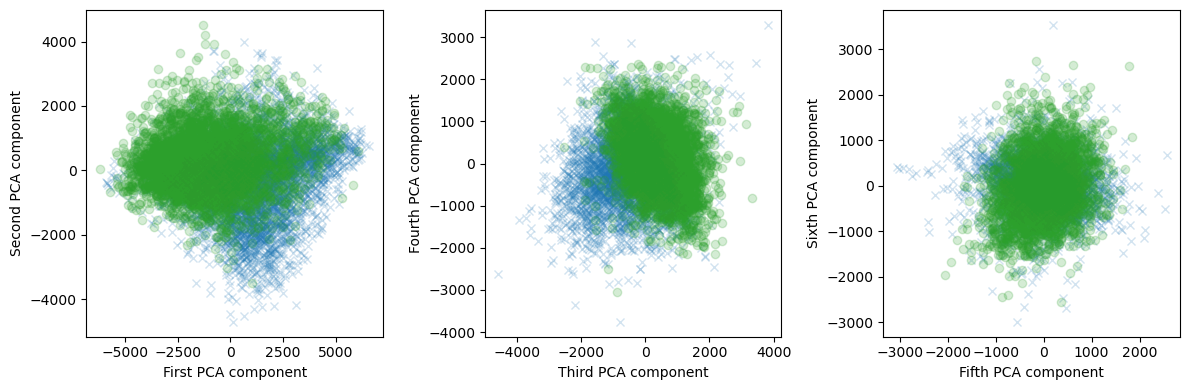

In [8]:
r = pca.transform(data)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
aargs = {'marker': 'x', 'color': 'tab:blue', 'linestyle': "", 'alpha': 0.2}
bargs = {'marker': 'o', 'color': 'tab:green', 'linestyle': "", 'alpha': 0.2}

axes[0].plot(r[labels == A, 0], r[labels == A, 1], **aargs)
axes[0].plot(r[labels == B, 0], r[labels == B, 1], **bargs)
axes[0].set_xlabel('First PCA component'); axes[0].set_ylabel('Second PCA component')

axes[1].plot(r[labels == A, 2], r[labels == A, 3], **aargs)
axes[1].plot(r[labels == B, 2], r[labels == B, 3], **bargs)
axes[1].set_xlabel('Third PCA component'); axes[1].set_ylabel('Fourth PCA component')

axes[2].plot(r[labels == A, 4], r[labels == A, 5], **aargs)
axes[2].plot(r[labels == B, 4], r[labels == B, 5], **bargs)
axes[2].set_xlabel('Fifth PCA component'); axes[2].set_ylabel('Sixth PCA component')
fig.tight_layout(); plt.show()

## Exercise 1

A simpler case, just to practice.  

Imagine, you have the following data.
 1. Use `sklearn.cluster.KMeans` algorithm.
 2. Plot `inertia` as a function of the number of clusters.
 3. Determine how many clusters you have by finding the "elbow".
 4. Compare your results with the "true" labels. Look at the border between classes. Do you see anything characteristic?

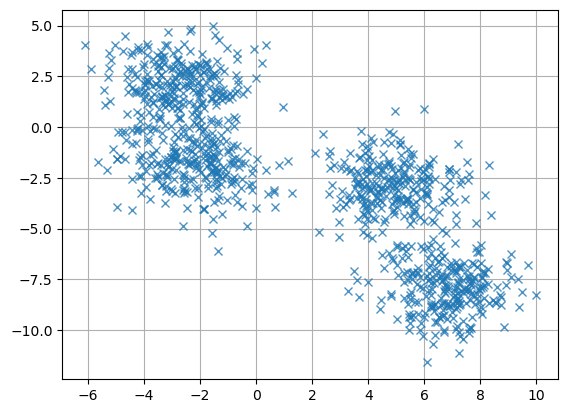

In [9]:
data, labels = sklearn.datasets.make_blobs(n_samples=1000, centers=4, cluster_std=1.20, random_state=44)

args = {'marker': 'x', 'linestyle': "", 'alpha': 0.8}
plt.plot(data[:,0], data[:,1], **args)
plt.grid(); plt.show()

In [18]:
kmeans = sklearn.cluster.KMeans(n_clusters=2).fit(data)
kmeans.inertia_

8569.086061726144

In [19]:
kmeans = sklearn.cluster.KMeans(n_clusters=3).fit(data)
kmeans.inertia_

4879.4562907341115

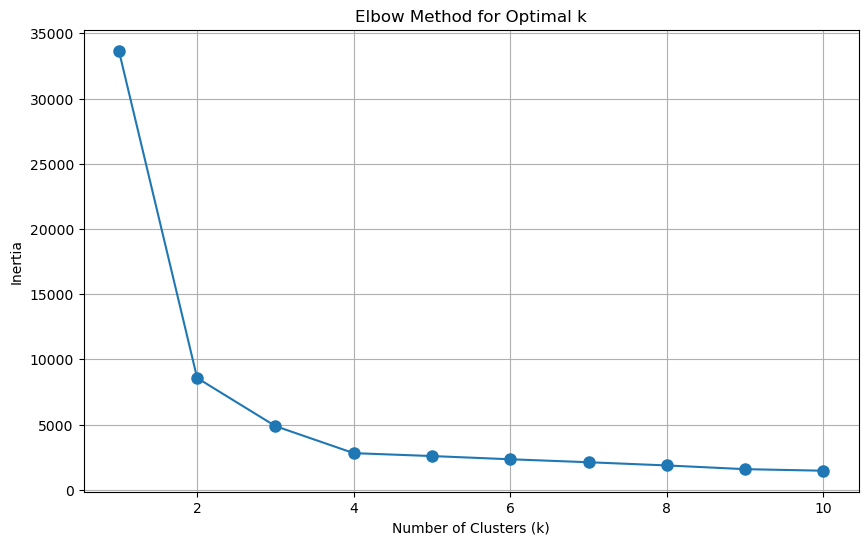

In [20]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = sklearn.cluster.KMeans(n_clusters=k, random_state=0, n_init="auto").fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

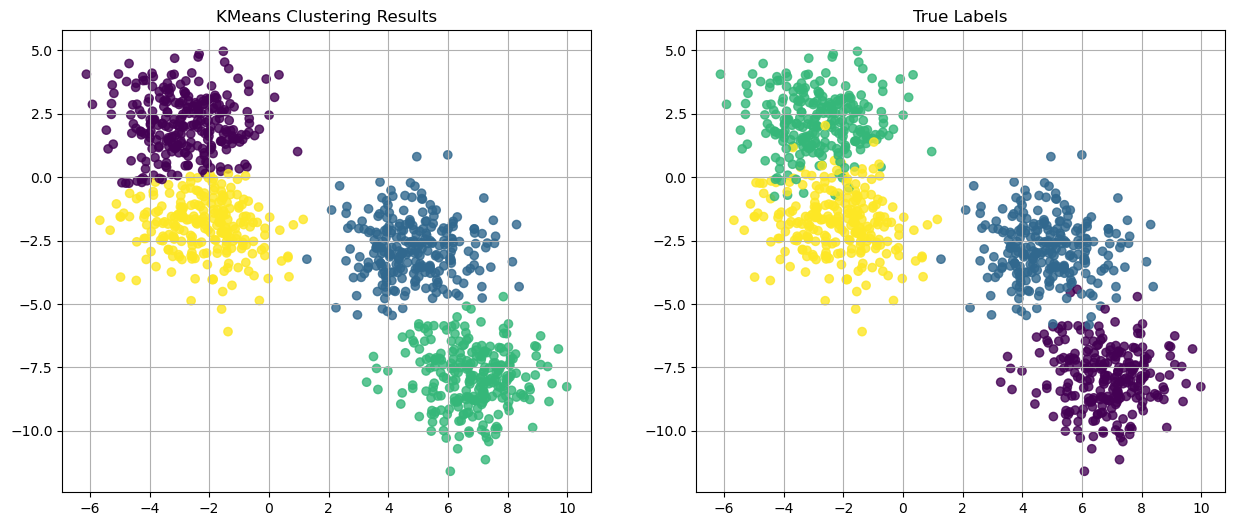

In [21]:
kmeans = sklearn.cluster.KMeans(n_clusters=4).fit(data)
predicted_labels = kmeans.labels_

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', marker='o', alpha=0.8)
plt.title('KMeans Clustering Results')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.8)
plt.title('True Labels')
plt.grid(True)

plt.show()